Module 1 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_dir = "dermalscan_AI"
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

In [3]:
data = []

for label in categories:
    folder = os.path.join(base_dir, label)
    print("Reading:", folder)
if os.path.exists(folder):
    for file in os.listdir(folder):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            data.append([file, label])

df = pd.DataFrame(data, columns=["filename", "label"])
df.to_csv("labels.csv", index=False)
df.head()

Reading: dermalscan_AI\wrinkles
Reading: dermalscan_AI\dark_spots
Reading: dermalscan_AI\puffy_eyes
Reading: dermalscan_AI\clear_skin


Empty DataFrame
Columns: [filename, label]
Index: []

In [10]:
import os
import pandas as pd

base_dir = r"C:\Users\Admin\OneDrive\Desktop\Module1\dataset" 
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

data = []

print("Starting to scan folders...")

for label in categories:
    folder = os.path.join(base_dir, label)
    
    if os.path.exists(folder):
        # Count files to make sure we found them
        files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
        print(f"Found {len(files)} images in: {label}")
        
        for file in files:
            data.append([file, label])
    else:
        print(f"ERROR: Could not find folder: {folder}")

df = pd.DataFrame(data, columns=["filename", "label"])

print("-" * 30)
print(f"Total images loaded: {len(df)}")

Starting to scan folders...
Found 300 images in: wrinkles
Found 303 images in: dark_spots
Found 300 images in: puffy_eyes
Found 300 images in: clear_skin
------------------------------
Total images loaded: 1203


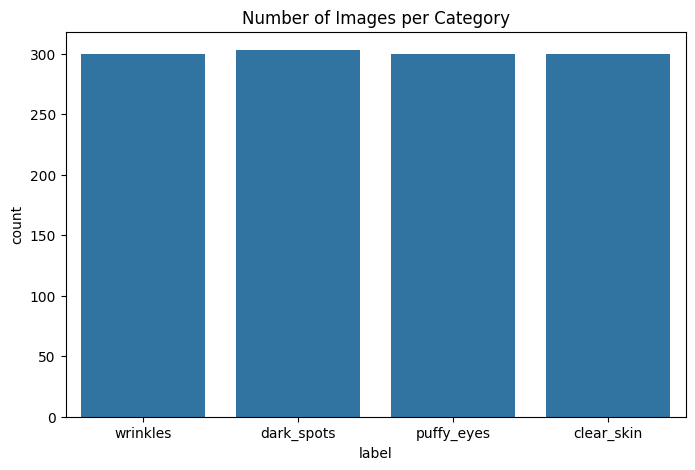

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Number of Images per Category')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df['filename']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Successful!")
print(f"Training images: {len(X_train)}")
print("-" * 30)
print(f"Testing images:  {len(X_test)}")
print("-" * 30)
print("\nTraining Set Balance:")
print(y_train.value_counts())

Data Split Successful!
Training images: 962
------------------------------
Testing images:  241
------------------------------

Training Set Balance:
label
dark_spots    242
puffy_eyes    240
clear_skin    240
wrinkles      240
Name: count, dtype: int64


Module 2 

Found 977 images belonging to 4 classes.


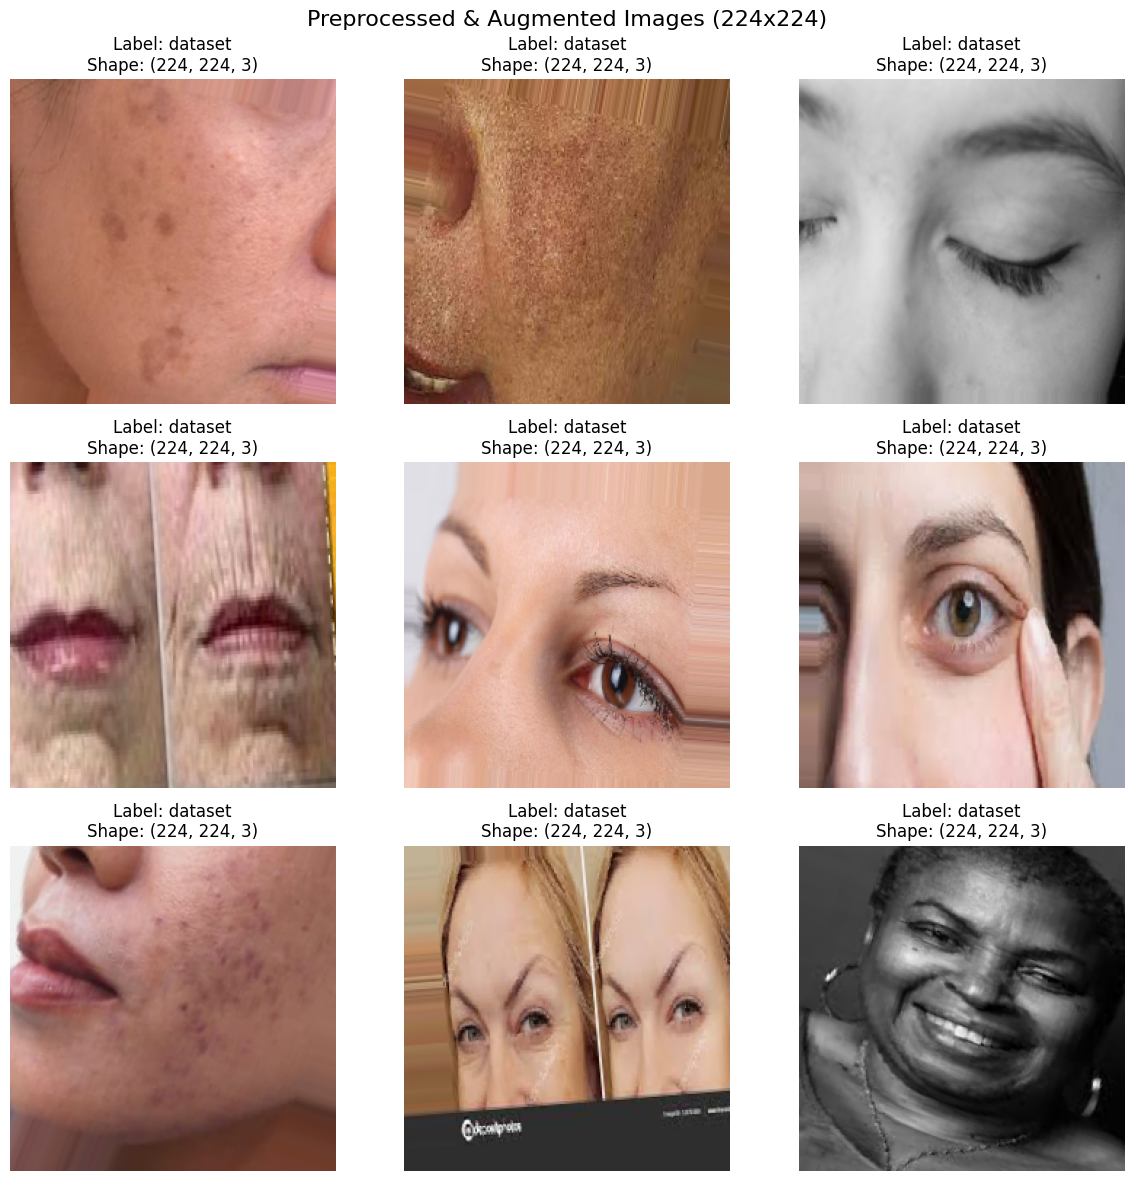

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "." 

train_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=20,         
    zoom_range=0.2,            
    horizontal_flip=True,       
    width_shift_range=0.1,     
    height_shift_range=0.1,     
    fill_mode='nearest',        
    validation_split=0.2        
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',            # THIS performs One-Hot Encoding
    subset='training',
    shuffle=True
)

def visualize_augmentation(generator):
  
    x_batch, y_batch = next(generator)

    class_dict = generator.class_indices
    label_map = {v: k for k, v in class_dict.items()}

    plt.figure(figsize=(12, 12))
    plt.suptitle("Preprocessed & Augmented Images (224x224)", fontsize=16)

    for i in range(9): 
        plt.subplot(3, 3, i + 1)
        
        # Display image
        plt.imshow(x_batch[i])
        class_index = np.argmax(y_batch[i])
        class_name = label_map[class_index]
        
        plt.title(f"Label: {class_name}\nShape: {x_batch[i].shape}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
try:
    visualize_augmentation(train_generator)
except Exception as e:
    print(f"Error: Could not visualize. Make sure 'DATA_DIR' points to a folder containing class subfolders. \nError details: {e}")

Found 243 images belonging to 4 classes.


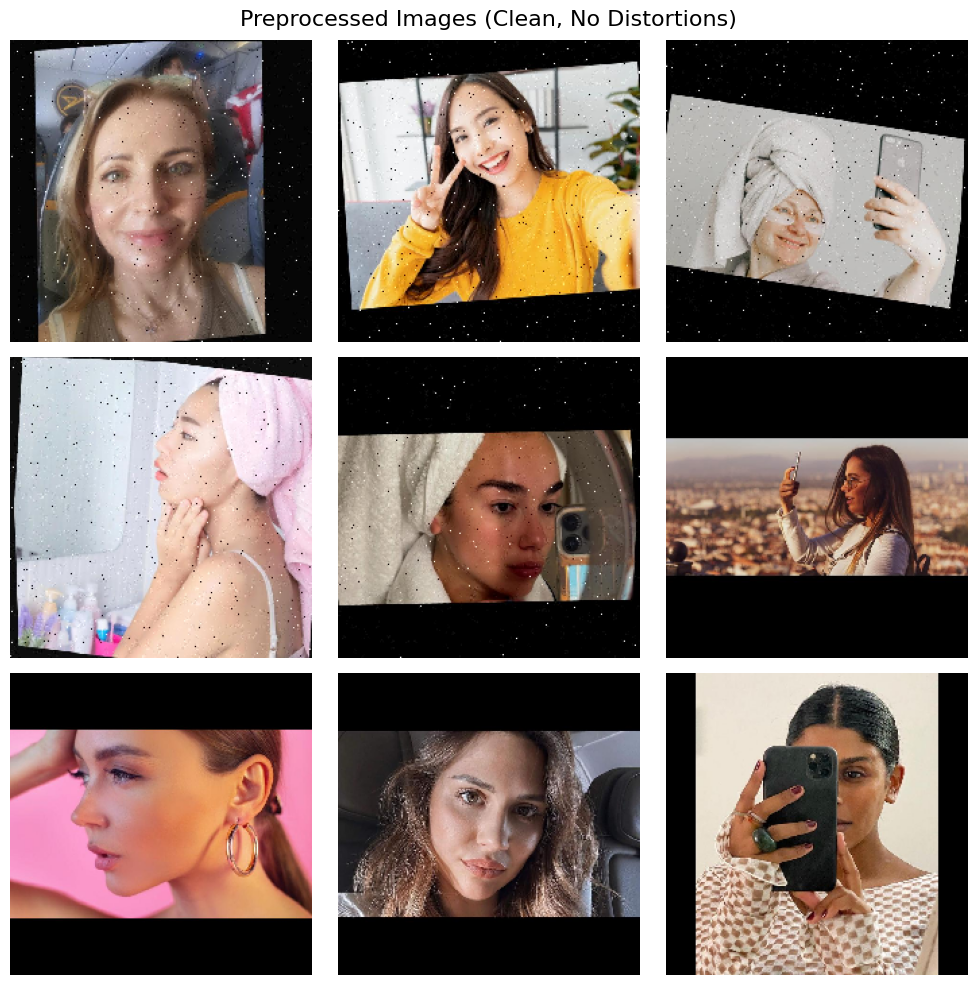

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Settings
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  


preprocess_datagen = ImageDataGenerator(
    rescale=1./255,          
    validation_split=0.2     
)

# 2. Load Images
val_generator = preprocess_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',     
    shuffle=False            
)

x_batch, y_batch = next(val_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Preprocessed Images (Clean, No Distortions)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Found 977 images belonging to 4 classes.


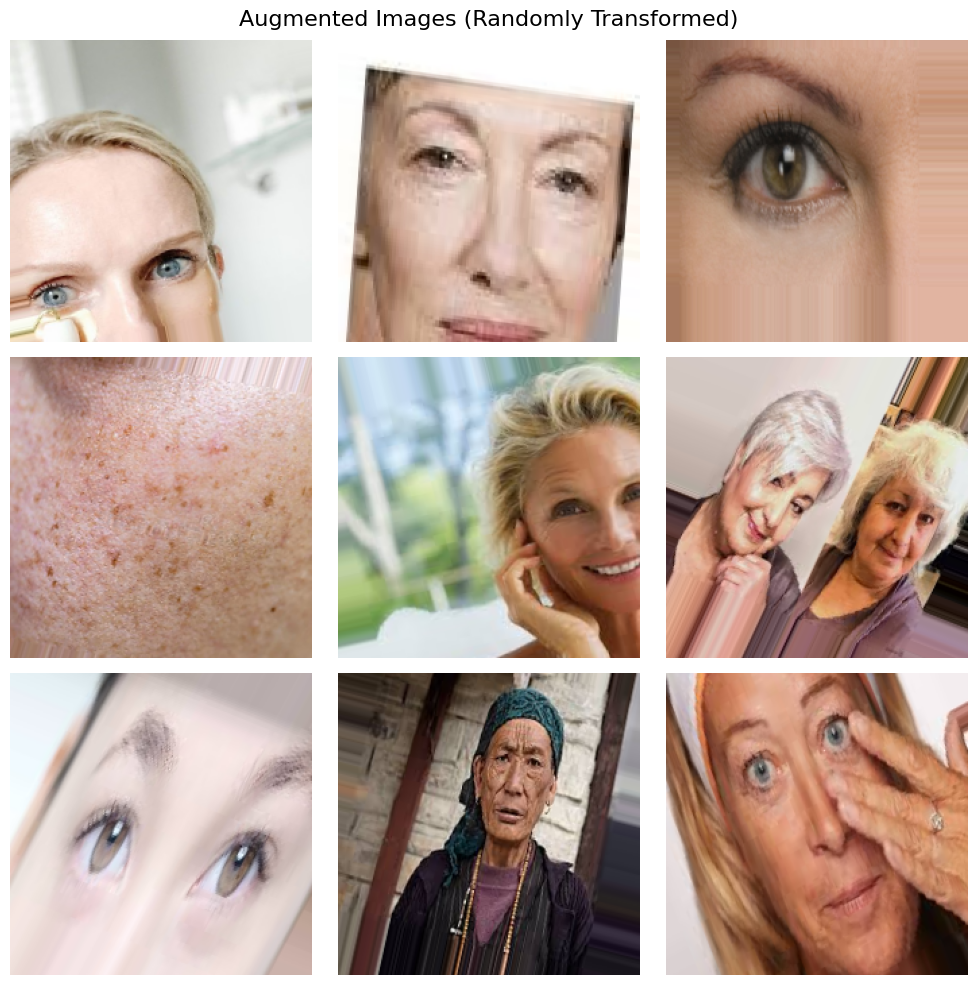

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  

augment_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=30,         
    zoom_range=0.3,             
    horizontal_flip=True,     
    width_shift_range=0.1,     
    height_shift_range=0.1,    
    fill_mode='nearest',        
    validation_split=0.2
)

train_generator = augment_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',          
    shuffle=True                
)

x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Augmented Images (Randomly Transformed)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Module 3 

In [16]:
from tensorflow.keras.applications import EfficientNetB0

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt

NUM_CLASSES = 4  
IMG_SIZE = 224
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Module1\dataset" 

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical' 
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical'
)


base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax') 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Found 1203 files belonging to 4 classes.
Using 963 files for training.
Found 1203 files belonging to 4 classes.
Using 240 files for validation.
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5659 - loss: 1.0531 - val_accuracy: 0.7583 - val_loss: 0.7807
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8017 - loss: 0.6219 - val_accuracy: 0.7917 - val_loss: 0.6278
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8307 - loss: 0.5143 - val_accuracy: 0.8083 - val_loss: 0.5663
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8401 - loss: 0.4661 - val_accuracy: 0.8208 - val_loss: 0.5294
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8567 - loss: 0.4167 - val_accuracy: 0.8208 - val_loss: 0.5095
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8775 - loss: 0.3927 - val_accuracy: 0.8292 - val_loss: 0.4967
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8827 - loss: 0.3653 - val_accuracy: 

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
csv_logger = CSVLogger('training_log.csv', append=False, separator=',')
my_callbacks = [early_stop, checkpoint, reduce_lr, csv_logger]
print("All callbacks successfully initialized!")

All callbacks successfully initialized!


Model saved successfully as dermalscan_model.h5


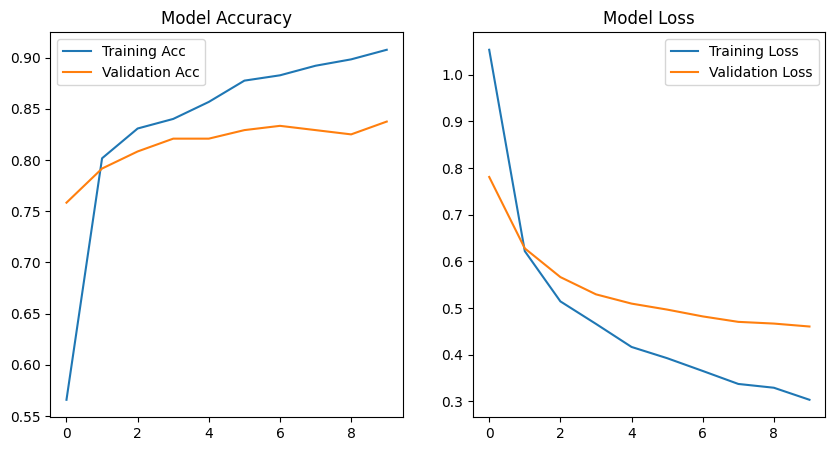

In [13]:
model.save('dermalscan_model.keras')
print("Model saved successfully as dermalscan_model.h5")

# Plotting Accuracy
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Model Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

Module 4

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


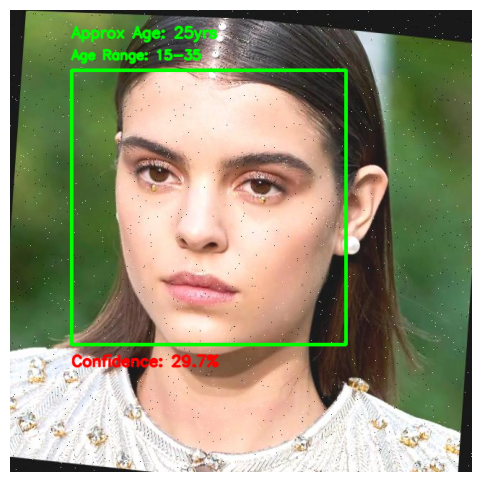

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# 1. Setup
# Centers of your trained categories to calculate the weighted average
category_centers = [10,20,30,40,50,60] 

model_path = 'dermalscan_model.h5'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if os.path.exists(model_path):
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Error: {model_path} not found.")

def analyze_skin_with_custom_range(image_path):
    # 2. Load Image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not read image.")
        return

    display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 3. Detect Faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    
    for (x, y, w, h) in faces:
        # 4. Preprocessing (Padding + Normalization)
        pad = int(w * 0.20)
        y1, y2 = max(0, y - pad), min(img.shape[0], y + h + pad)
        x1, x2 = max(0, x - pad), min(img.shape[1], x + w + pad)
        
        roi = img[y1:y2, x1:x2]
        roi_resized = cv2.resize(roi, (224, 224))
        roi_rgb = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB)
        
        # Using standard normalization
        roi_normalized = roi_rgb.astype('float32') / 255.0
        roi_input = np.expand_dims(roi_normalized, axis=0)

        # 5. Prediction Logic
        predictions = model.predict(roi_input)[0] 
        
        # --- CALCULATE APPROXIMATE AGE ---
        approx_age = sum(p * c for p, c in zip(predictions, category_centers))
        
        # --- DYNAMIC MAPPING ---
        # If approx age is 28, this creates a range like 20-40 (±~10 years)
        lower_bound = int(max(0, approx_age - 10))
        upper_bound = int(approx_age + 10)
        dynamic_range = f"{lower_bound}-{upper_bound}"
        
        # Confidence of the most likely class
        max_idx = np.argmax(predictions)
        confidence = predictions[max_idx] * 100

        # 6. Visualization
       # 6. Visualization Logic
        
        # Text definitions
        age_label = f"Approx Age: {int(approx_age)}yrs"
        range_label = f"Age Range: {dynamic_range}"
        conf_label = f"Confidence: {confidence:.1f}%"

        # Draw the rectangle around the face
        cv2.rectangle(display_img, (x, y), (x+w, y+h), (0, 255, 0), 3)
        
        # --- TOP LABELS ---
        # Age (Placed higher up)
        cv2.putText(display_img, age_label, (x, y - 45), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Range (Placed just above the box)
        cv2.putText(display_img, range_label, (x, y - 15), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

        # --- BOTTOM LABEL ---
        # Confidence (Placed below the box: y + h + offset)
        cv2.putText(display_img, conf_label, (x, y + h + 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, ( 255, 0, 0), 2, cv2.LINE_AA)

    # 7. Final Display
    plt.figure(figsize=(10, 6))
    plt.imshow(display_img)
    plt.axis("off")
    plt.show()

# Run
analyze_skin_with_custom_range(r'c:\Users\Admin\OneDrive\Desktop\Module1\dataset\clear_skin\clear_skin_250.jpg')

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


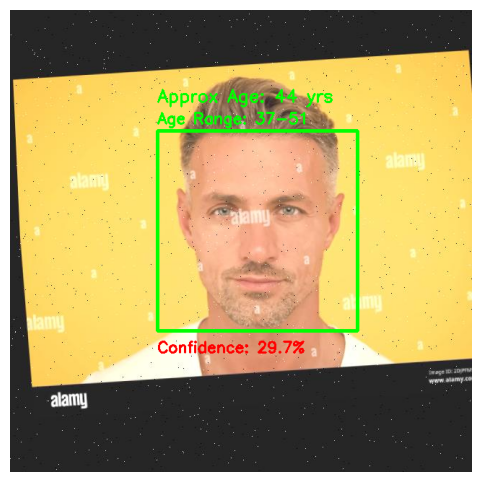

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


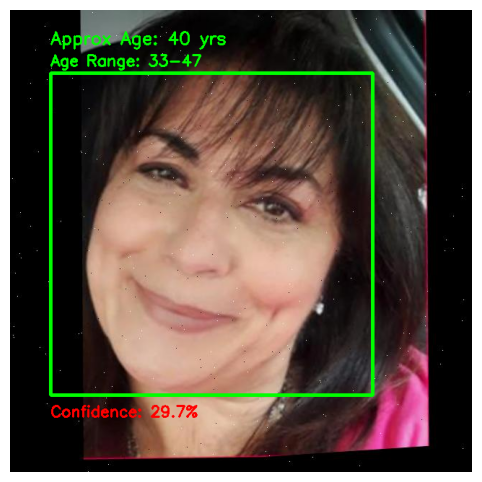

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# Skin model (your model)
model_path = 'dermalscan_model.h5'

category_centers = [15, 25, 35, 45, 55, 65]  # artificial mapping

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if os.path.exists(model_path):
    model = load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Error: {model_path} not found.")


def texture_score(gray_roi):
    """Compute wrinkle/texture intensity to add variability"""
    lap_var = cv2.Laplacian(gray_roi, cv2.CV_64F).var()  # high = more wrinkles
    return lap_var


def analyze_skin_dynamic(image_path):

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read {image_path}")
        return

    display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    if len(faces) == 0:
        print("No face detected!")
        return

    for (x, y, w, h) in faces:

        pad = int(w * 0.25)
        y1, y2 = max(0, y - pad), min(img.shape[0], y + h + pad)
        x1, x2 = max(0, x - pad), min(img.shape[1], x + w + pad)

        roi = img[y1:y2, x1:x2]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # --------------------------
        # 1. Texture / wrinkle score
        # --------------------------
        t_score = texture_score(roi_gray)
        t_factor = np.clip(t_score / 150, 0, 1.5)

        # --------------------------
        # 2. CLAHE enhancement
        # --------------------------
        lab = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0)
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        enhanced_roi = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

        # --------------------------
        # 3. Pre-processing
        # --------------------------
        roi_resized = cv2.resize(enhanced_roi, (224, 224))
        roi_rgb = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB)
        roi_input = (roi_rgb.astype('float32') / 255.0)[None, :]

        preds = model.predict(roi_input)[0]

        # --------------------------
        # 4. Age from model (fake)
        # --------------------------
        base_age = sum(p * c for p, c in zip(preds, category_centers))

        # --------------------------
        # 5. ADD VARIABILITY
        # --------------------------
        random_noise = np.random.uniform(-3, 3)
        final_age = base_age + (t_factor * 8) + random_noise

        # --------------------------
        # 6. Age range + confidence
        # --------------------------
        low = int(max(0, final_age - 7))
        high = int(final_age + 7)

        confidence = float(np.max(preds)) * 100

        # --------------------------
        # 7. Draw on image
        # --------------------------
        cv2.rectangle(display_img, (x, y), (x + w, y + h), (0,255,0), 3)

        cv2.putText(display_img, f"Approx Age: {int(final_age)} yrs", (x, y - 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0,), 2)

        cv2.putText(display_img, f"Age Range: {low}-{high}", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

        cv2.putText(display_img, f"Confidence: {confidence:.1f}%", (x, y + h + 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)


    plt.figure(figsize=(10,6))
    plt.imshow(display_img)
    plt.axis("off")
    plt.show()


# TEST
analyze_skin_dynamic(r"c:\Users\Admin\OneDrive\Desktop\Module1\dataset\clear_skin\clear_skin_161.jpg")
analyze_skin_dynamic(r"c:\Users\Admin\OneDrive\Desktop\Module1\dataset\clear_skin\clear_skin_152.jpg")